Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-04
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7267U CPU @ 3.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 167 rows, 71 columns and 603 nonzeros
Model fingerprint: 0x6f5c9f33
Model has 52 quadratic constraints
Variable types: 16 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e-03, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 32 rows and 2 columns
Presolve time: 0.02s
Presolved: 135 rows, 69 columns, 667 nonzeros
Variable types: 16 continuous, 53 integer (53 binary)
Found heuristic solution: objective -0.0000000

Root relaxation: objective 3.000000e+00, 29 iterations, 0.01 sec

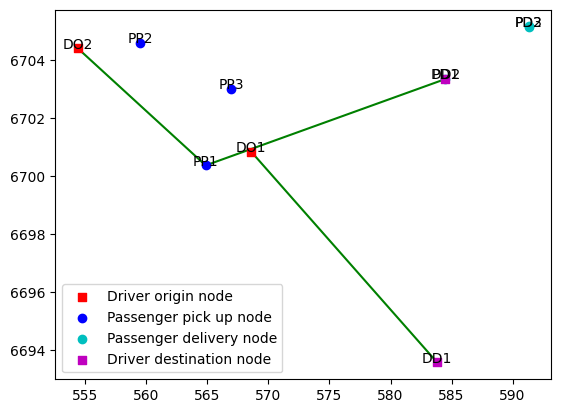

In [1]:
import folium
import main



Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7267U CPU @ 3.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 334 rows, 71 columns and 1206 nonzeros
Model fingerprint: 0x398f93f0
Model has 104 quadratic constraints
Variable types: 16 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e-03, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]

MIP start from previous solve produced solution with objective 1 (0.05s)
Loaded MIP start from previous solve with objective 1

Presolve removed 199 rows and 2 columns
Presolve time: 0.01s
Presolved: 135 rows, 69 columns, 667 nonzeros
Variable types: 16 continuous, 53 integer (53 binary)

Root relaxation: objective 3.000000e+00, 81 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Cu

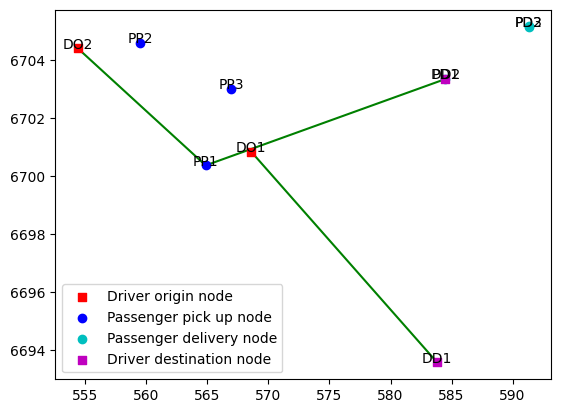

In [2]:
arcs, not_used= main.run_only_once()
m = folium.Map(location=[60.355, 5.21], zoom_start=12)


def get_coordinates():

    result = {}
    for driver in arcs:
        visitation_sequence=[]
        for arc in arcs[driver]:
            if arc[0] not in visitation_sequence:
                visitation_sequence.append(arc[0])
            if arc[1] not in visitation_sequence:
                visitation_sequence.append(arc[1])

        driver_origin = []
        driver_destination = []
        passenger_pickup = []
        passenger_delivery = []

    
        for node in visitation_sequence:
            
            driver_origin_nr = 1
            driver_destination_nr = 1

            if node in main.D:
                for d in main.drivers_json:
                    if main.drivers_json[d]['id'] == node:
                        driver_origin.append(
                            (main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021))
                        driver_destination.append(
                            (main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021))


                        folium.Marker(location = [main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021], icon=folium.Icon(color="red")).add_child(folium.Popup('DO' + str(driver_origin_nr))).add_to(m)
                        folium.Marker(location = [main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021], icon=folium.Icon(color="green")).add_child(folium.Popup('DD' + str(driver_destination_nr))).add_to(m)
               
               
                    driver_origin_nr +=1
                    driver_destination_nr +=1

            passenger_pickup_nr = 1
            passenger_delivery_nr = 1
            for p in main.passengers_json:
                if node in main.NP:
                    if main.passengers_json[p]['id'] == node:
                        passenger_pickup.append(
                            (main.passengers_json[p]['origin_yc']/111.021, main.passengers_json[p]['origin_xc']/111.021))

                
                if node in main.ND:
                    if main.passengers_json[p]['id'] == node - main.nr_passengers:
                        passenger_delivery.append((main.passengers_json[p]['destination_yc']/111.021, main.passengers_json[p]['destination_xc']/111.021))
                
                
                folium.CircleMarker(location = [main.passengers_json[p]['origin_yc']/111.021,main.passengers_json[p]['origin_xc']/111.021] , radius = 6, color = 'blue', fill_color ='blue').add_child(folium.Popup('PP' + str(passenger_pickup_nr))).add_to(m)
                folium.CircleMarker(location = [main.passengers_json[p]['destination_yc']/111.021,main.passengers_json[p]['destination_xc']/111.021] , radius = 6, color = 'purple', fill_color ='purple').add_child(folium.Popup('PD' + str(passenger_delivery_nr))).add_to(m)
                passenger_pickup_nr+=1
                passenger_delivery_nr+=1

        result[driver] = driver_origin + passenger_pickup + passenger_delivery + driver_destination
        
        #folium.Marker(driver_origin[0], icon=folium.Icon(color="red")).add_to(m)
        #folium.Marker(driver_destination[0], icon=folium.Icon(color="green")).add_to(m)

        
    return result


for driver in main.D:
    folium.PolyLine(get_coordinates()[driver]).add_to(m)

m